# Contexto
Preveja se um cavalo pode ou não sobreviver com base em condições médicas passadas.

# Conteúdo
Existem muitos NAs nos dados. Esta é a verdadeira luta aqui. Tente encontrar uma maneira de contornar isso através da imputação ou de outros meios.

In [1]:
#Importando as bibliotecas para manipulação e visualização do dataset

import pandas as pd
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/guilh/Desktop/Projetinhos/Horse/horse.csv')

# Análise exploratória

In [3]:
#Verificando as informações do dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
surgery                  299 non-null object
age                      299 non-null object
hospital_number          299 non-null int64
rectal_temp              239 non-null float64
pulse                    275 non-null float64
respiratory_rate         241 non-null float64
temp_of_extremities      243 non-null object
peripheral_pulse         230 non-null object
mucous_membrane          252 non-null object
capillary_refill_time    267 non-null object
pain                     244 non-null object
peristalsis              255 non-null object
abdominal_distention     243 non-null object
nasogastric_tube         195 non-null object
nasogastric_reflux       193 non-null object
nasogastric_reflux_ph    53 non-null float64
rectal_exam_feces        197 non-null object
abdomen                  181 non-null object
packed_cell_volume       270 non-null float64
total_protein            266 non-null

In [4]:
#Visualizando os 10 primeiros valores do dataset
df.head(10)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
5,no,adult,528355,NaN,NaN,NaN,warm,normal,pale_pink,less_3_sec,...,NaN,NaN,NaN,NaN,lived,no,0,0,0,no
6,yes,adult,526802,37.9,48.0,16.0,normal,normal,normal_pink,less_3_sec,...,37.0,7.0,NaN,NaN,lived,yes,3124,0,0,no
7,yes,adult,529607,NaN,60.0,NaN,cool,NaN,NaN,less_3_sec,...,44.0,8.3,NaN,NaN,died,yes,2208,0,0,no
8,no,adult,530051,NaN,80.0,36.0,cool,absent,pale_pink,less_3_sec,...,38.0,6.2,NaN,NaN,euthanized,yes,3205,0,0,no
9,no,young,5299629,38.3,90.0,NaN,normal,NaN,normal_pink,less_3_sec,...,40.0,6.2,clear,2.2,lived,no,0,0,0,yes


In [5]:
#Resumo estatístico do df
df.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [6]:
#Conferindo a quantidade de nulos nas colunas
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

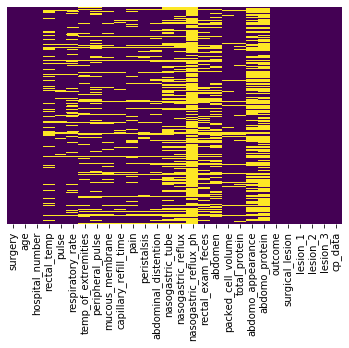

In [7]:
#Visualizando os valores missing (nulos)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

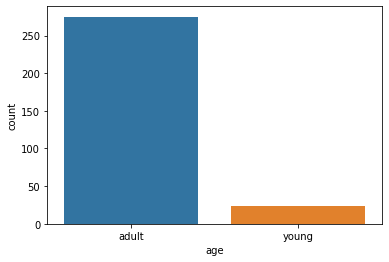

In [8]:
#Contagem dos cavalos
sns.countplot(x='age',data=df)

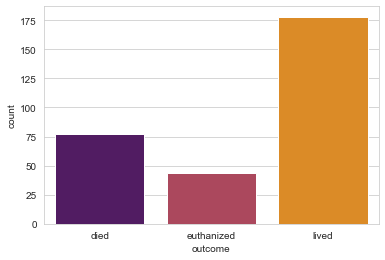

In [9]:
#Visualização da contagem de cavalos que sobreviveram 
sns.set_style('whitegrid')
sns.countplot(x='outcome',data=df,palette='inferno')

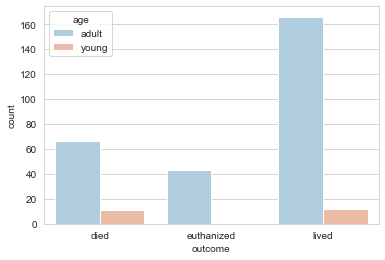

In [10]:
#Visualização dos cavalos que sobreviveram separado pela idade
sns.set_style('whitegrid')
sns.countplot(x='outcome',hue='age',data=df,palette='RdBu_r')

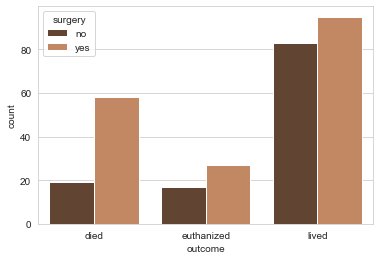

In [11]:
#Visualização dos cavalos que fizeram cirurgia
sns.set_style('whitegrid')
sns.countplot(x='outcome',hue='surgery',data=df,palette='copper')

C:\Users\guilh\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\guilh\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


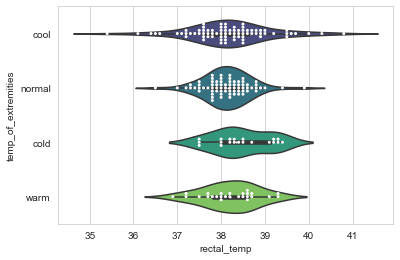

In [12]:
#plt.figure(figsize=(11, 7)) -- Aumentar o tamanho 

#Visualização da temperatura retal (em graus celsius) e das extremidades
sns.violinplot(x="rectal_temp", y="temp_of_extremities", data=df,palette='viridis')
sns.swarmplot(x="rectal_temp", y="temp_of_extremities", data=df,color='white',size=3)

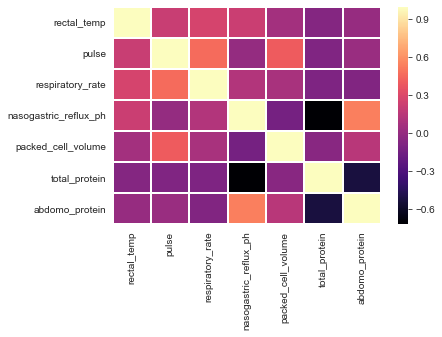

In [13]:
# Correlação das variáveis
sns.heatmap(df[['rectal_temp','pulse','respiratory_rate',
                'nasogastric_reflux_ph','packed_cell_volume',
                'total_protein','abdomo_protein']].corr(),cmap='magma',
            linecolor='white',linewidths=1)

In [14]:
#Criando uma nova coluna no dataset para melhor visualização do plot de regressão

df['outcome_visu'] = ["Não sobreviveu" if x=='died'or x=='euthanized' else "Sobreviveu"
                      for x in df['outcome']]

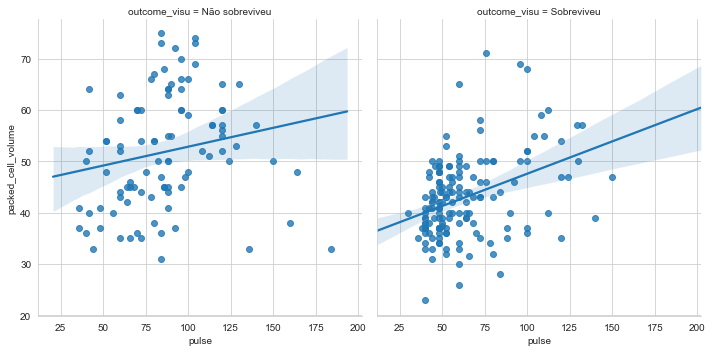

In [15]:
# Visualizando a regressão de sobreviventes por pulso e glóbulos vermelhos
sns.lmplot(x='pulse',y='packed_cell_volume',data=df,col='outcome_visu')

# Até aqui podemos concluir que:
    - 59% dos cavalos sobreviveram
    - 92% dos cavalos são adultos e 8% jovem (menos de 6 meses)
    - Dos cavalos jovens, praticamente metade não sobreviveram
    - Dentre os sobreviventes, o número é maior quando o cavalo não teve de passar por nenhuma cirurgia
    - Dentre os que faleceram, o número é maior quando o cavalo teve de fazer uma ou mais cirurgias
    - Em relação a 'rectal_temp' (temperatura retal em graus celsius) o valor normal é 37,8. Quando um cavalo está abaixo desta temperatura ele pode ter choque circulatório e quando está acima pode ter uma infecção. Vimos que poucos cavalos está na temperatura ideal
    - Em relação a 'temp_of_extremities' (temperatura das extremidades) cool e cold indicam possível choque circulatório, já warm se correlaciona com uma temperatira retal elevada
    - Cavalos com um pulso elevado (frequência de batimentos por minuto) são os que provavelmente vão ter lesões ou algum problema de choque circulatório, vindo a falecer
    - Cavalos com um número de glóbulos vermelhos entre 30 e 50 são mais prováveis a sobreviver, os que passam deste número fatalmente podem ficar desidratados ou até falecer

# Tratamento dos dados nulos

In [16]:
#Coluna do hospital
#o número do caso atribuído ao cavalo (pode não ser único se o cavalo for tratado> 1 vez)

cont = df['hospital_number'].value_counts()>1
a = list(cont)
conta = 0
for x in a:
    if x == True:
        conta = conta +1
print("A quantidade de valores duplicados é: ", conta)

"""
Existem 16 valores duplicados, analisando o dataset desses 16 cavalos que tiveram passagem mais de uma 
vez pelo hospital 6 morreram e 10 estão vivos.
A coluna ID_hospital não irá entrar no modelo de aprendizado de máquina
"""

A quantidade de valores duplicados é:  16


'\nExistem 16 valores duplicados, analisando o dataset desses 16 cavalos que tiveram passagem mais de uma \nvez pelo hospital 6 morreram e 10 estão vivos.\nA coluna ID_hospital não irá entrar no modelo de aprendizado de máquina\n'

# Variáveis numéricas 

In [17]:
# Coluna temperatura retal 
##Preenchendo os valores nulos de temperatura com a média dos grupos de idade 

df['rectal_temp'] = df['rectal_temp'].groupby(df['age']).apply(lambda x: x.fillna(x.median()))

In [18]:
# Coluna pulse
##Preenchendo os valores nulos de pulso com a média dos grupos de idade 

df['pulse'] = df['pulse'].groupby(df['age']).apply(lambda x: x.fillna(x.median()))

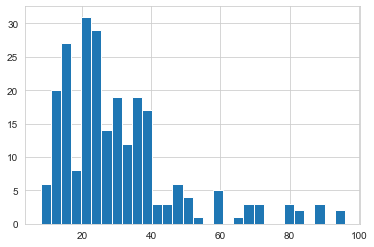

In [19]:
#Coluna frequência respiratória

"""Os valores normais estão entre 8 e 10, por isso esta variável se torna um pouco duvidosa 
de se utilizar, pois tem um grande volume de flutuação, podemos ver isso no histograma abaixo"""

df['respiratory_rate'].hist(bins=30)
df['respiratory_rate'] = df['respiratory_rate'].groupby(df['age']).apply(lambda x: x.fillna(x.median()))

In [20]:
# Coluna refluxo nasogástrico PH

df['nasogastric_reflux_ph'] = df['nasogastric_reflux_ph'].groupby(df['age']).apply(lambda x: x.fillna(x.median()))

In [21]:
#Coluna Volume de células compactadas

df['packed_cell_volume'] = df['packed_cell_volume'].groupby(df['age']).apply(lambda x: x.fillna(x.median()))

In [22]:
#Coluna Proteína total 

df['total_protein'] = df['total_protein'].groupby(df['age']).apply(lambda x: x.fillna(x.median()))

In [23]:
#Colune Proteína total de abdomcentese

df['abdomo_protein'] = df['abdomo_protein'].groupby(df['age']).apply(lambda x: x.fillna(x.median()))

# Variáveis categóricas
 - Para colunas categórias o preenchimento dos valores missing é o que mais se repete na coluna

In [24]:
#Coluna temperatura das extremidades

#df['temp_of_extremities'].value_counts()
df['temp_of_extremities'].fillna("cool", inplace = True)

In [25]:
#Coluna pulso periférico

#df['peripheral_pulse'].value_counts()
df['peripheral_pulse'].fillna("normal", inplace = True)

In [26]:
#Coluna membranas mucosas

#df['mucous_membrane'].value_counts()
df['mucous_membrane'].fillna("normal_pink",inplace = True)

In [27]:
# Coluna Tempo de recarga capilar

#df['capillary_refill_time'].value_counts()
df['capillary_refill_time'].fillna("less_3_sec",inplace = True)

In [28]:
# Coluna dor

#df['pain'].value_counts()
df['pain'].fillna("mild_pain", inplace = True)

In [29]:
# Coluna Peristaltismo 

#df['peristalsis'].value_counts()
df['peristalsis'].fillna("hypomotile",inplace = True)

In [30]:
# Coluna Distensão abdominal (abdominal distension)

#df['abdominal_distention'].value_counts()
df['abdominal_distention'].fillna("none",inplace = True)

In [31]:
# Coluna Sonda nasogástrica (nasogastric tube )

#df['nasogastric_tube'].value_counts()
df['nasogastric_tube'].fillna("slight", inplace=True)

In [32]:
#Coluna Refluxo nasogástrico (nasogastric reflux )

#df['nasogastric_reflux'].value_counts()
df['nasogastric_reflux'].fillna("none",inplace = True)

In [33]:
# Coluna Exame retal-fezes (rectal_examination - feces)

#df['rectal_exam_feces'].value_counts()
df['rectal_exam_feces'].fillna("absent", inplace=True)

In [34]:
# Coluna Abdômen (abdomen)

#df['abdomen'].value_counts()
df['abdomen'].fillna("distend_large",inplace=True)

In [35]:
#Coluna Aparência de abdominocentese (abdominocentesis appearance)

#df['abdomo_appearance'].value_counts()
df['abdomo_appearance'].fillna("cloudy",inplace = True)

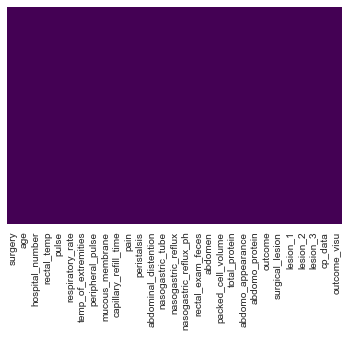

In [36]:
#Visualizando os valores missing (nulos)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Tratamento das variáveis categóricas para o modelo de machine learning

In [37]:
#Coluna cirurgia, alvo e lesão na cirurgia 

df['surgery'] = [1 if x =='no' else 0 for x in df['surgery']]
df['outcome'] = [0 if x=='died'or x=='euthanized' else 1 for x in df['outcome']]
df['surgical_lesion'] = [1 if x == 'no' else 0 for x in df['surgical_lesion']]

# - One Hot Encoder

In [38]:
from category_encoders.one_hot import OneHotEncoder

In [39]:
enc = OneHotEncoder(cols=['age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane',
                          'capillary_refill_time', 'pain', 'peristalsis',
                          'abdominal_distention','nasogastric_tube','nasogastric_reflux',
                         'rectal_exam_feces','abdomen','abdomo_appearance'], use_cat_names=True)
df_tratado = enc.fit_transform(df)

In [40]:
#Excluindo as colunas que não vão entrar no modelo
df_tratado.drop(columns=['lesion_1','lesion_2','lesion_3','hospital_number','respiratory_rate','cp_data','outcome_visu'], inplace=True)

# Validação cruzada

In [41]:
from sklearn.model_selection import RepeatedKFold
X = df_tratado.drop('outcome',axis=1)
y = df_tratado['outcome']

In [42]:
#Bibliotecas dos algoritmos

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [43]:
kf = RepeatedKFold (n_splits = 3, n_repeats = 5, random_state=0)
resultados = []
for linhas_treino, linhas_teste in kf.split(X):
    #print("Treino:", linhas_treino.shape[0])
    #print("Valid:", linhas_valid.shape[0])

    X_train, X_test = X.iloc[linhas_treino],X.iloc[linhas_teste]
    y_train, y_test = y.iloc[linhas_treino],y.iloc[linhas_teste]

    #modelo1 = LogisticRegression()
    #modelo2 = DecisionTreeClassifier()
    #modelo3= RandomForestClassifier(n_estimators = 100, n_jobs=5, random_state=0)
    modelo4 = XGBClassifier()
    #modelo5 = LGBMClassifier(learning_rate=0.024,num_leaves=45,min_child_samples=7,subsample=0.76,colsample_bytree=0.77)
    
    modelo4.fit(X_train,y_train)
    pred =  modelo4.predict(X_test)
    acuracia = np.mean(y_test == pred)
    resultados.append(acuracia)
print("Sua precisão foi:", np.mean(resultados))

Sua precisão foi: 0.7364377104377103


# Resultados da validação cruzada

- Regressão logística: 0.717
- Árvore de decisão: 0.65
- Floresta aleatória: 0.733
- XGBOOST: 0.736
- LGBM: 0.733

# Divisão treino e teste

In [59]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_tratado.drop('outcome',axis=1), 
                                                    df_tratado['outcome'], test_size=0.50, random_state=0)

In [56]:
Xg = XGBClassifier(learning_rate=0.01,n_estimators=280,max_depth=4,subsample=0.9,colsample_bytree=0.5)
Xg.fit(X_train, y_train)
Xg_predict = Xg.predict(X_test)

In [57]:
print(classification_report(y_test,Xg_predict))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71        61
           1       0.79      0.87      0.82        89

    accuracy                           0.78       150
   macro avg       0.78      0.76      0.77       150
weighted avg       0.78      0.78      0.78       150



In [58]:
print(confusion_matrix(y_test,Xg_predict))

[[40 21]
 [12 77]]


# Resultado de precisão final 

In [61]:
accuracy = accuracy_score(y_test, Xg_predict)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 78.00%


# Hiperparâmetro XGBOOST

In [49]:
from sklearn.metrics import roc_auc_score
from skopt import dummy_minimize

In [50]:
def treinar_modelo(params):
    learning_rate = params[0]
    n_estimators = params[1]
    max_depth = params[2]
    subsample = params[3]
    colsample_bytree = params[4]
    
    xgboost = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators,max_depth=max_depth,subsample=subsample,colsample_bytree=colsample_bytree)
    xgboost.fit(X_train, y_train)
    
    pip = xgboost.predict_proba(X_test)[:,1]
    
    return -roc_auc_score(y_test, pip)

space = [(1e-3, 1e-1, 'log-uniform'), #learning rate
         (100, 1000), # n_estimators
         (1, 5), # max_depth
         (0.05, 1.0), # subsample
         (0.1, 1.0)] # colsample bytree

resultado = dummy_minimize(treinar_modelo, space, random_state=0, verbose=1, n_calls=30)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.2204
Function value obtained: -0.8635
Current minimum: -0.8635
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.2414
Function value obtained: -0.8543
Current minimum: -0.8635
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.3072
Function value obtained: -0.8178
Current minimum: -0.8635
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0638
Function value obtained: -0.7766
Current minimum: -0.8635
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.4906
Function value obtained: -0.8560
Current minimum: -0.8635
Iteration No: 6 started. 

In [51]:
resultado.x

[0.013947738988072804, 280, 4, 0.9551115609411358, 0.5024128407558647]